<a href="https://colab.research.google.com/github/eldercamposds/TreinamentoModelosDeRegressao/blob/main/RegressaoStatsModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [4]:
base = pd.read_csv("https://raw.githubusercontent.com/eldercamposds/TreinamentoModelosDeRegressao/refs/heads/main/mt_cars.csv")

In [5]:
base.shape

(32, 12)

In [6]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
base = base.drop(['Unnamed: 0'], axis=1)

In [8]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

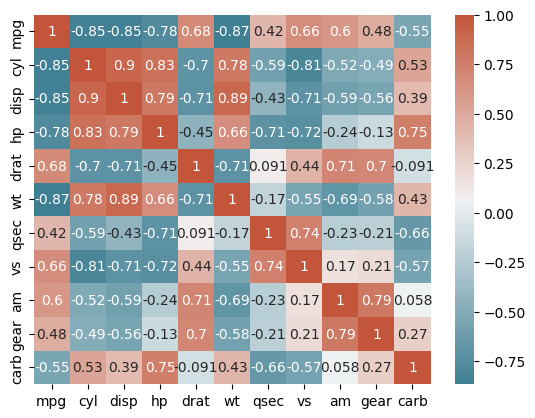

In [12]:
#correlograma
corr = base.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

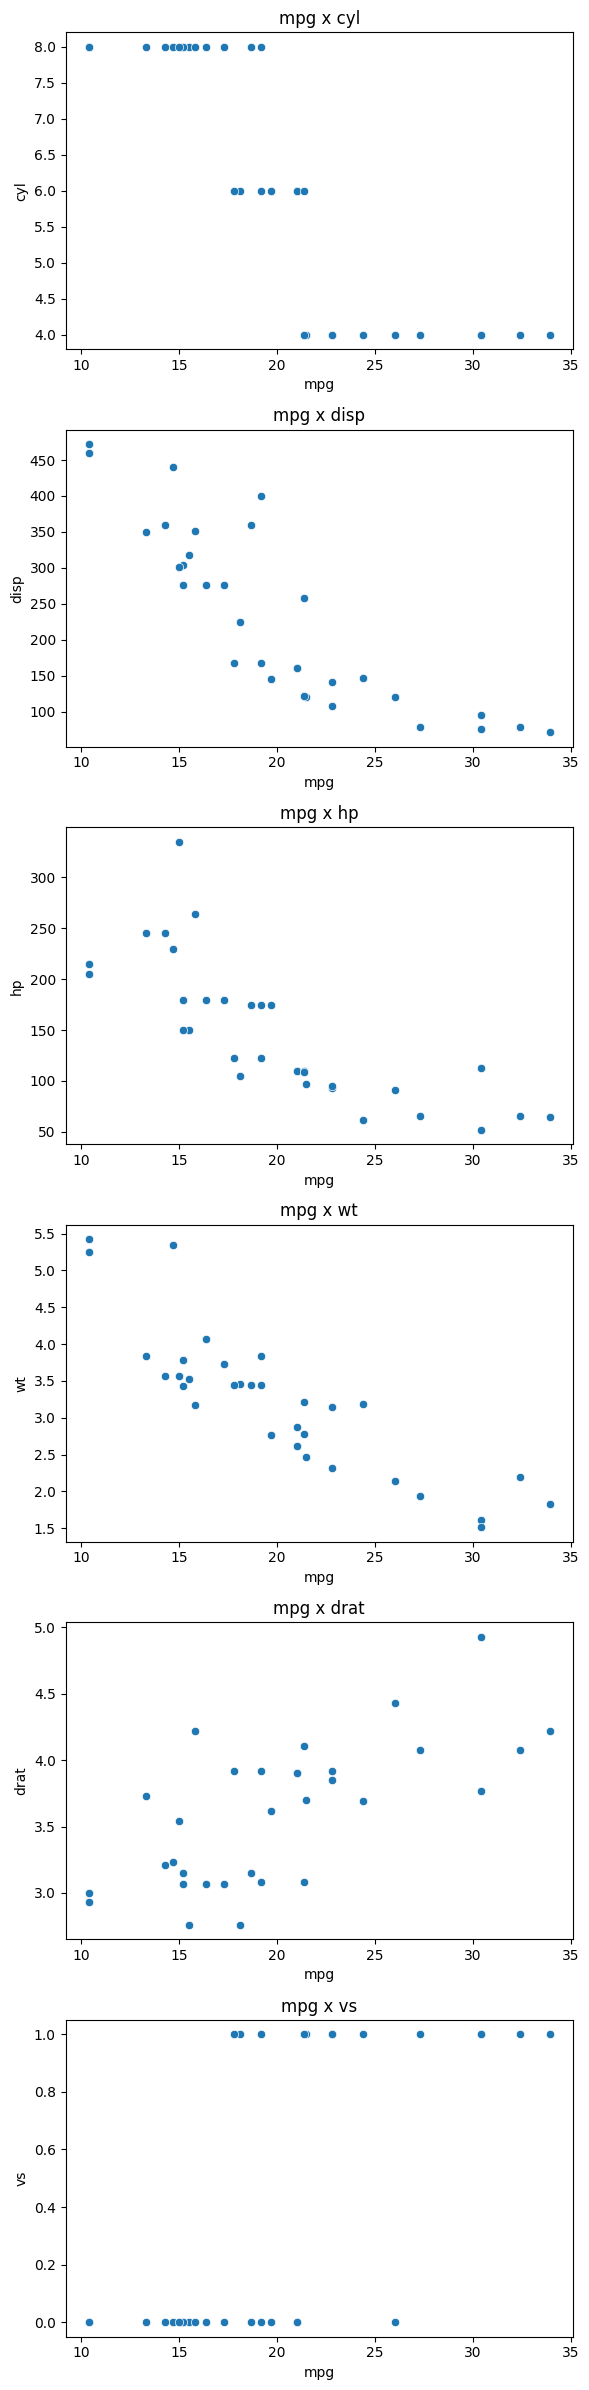

In [20]:
#pares de colunas com correlação interessante
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'wt'), ('mpg', 'drat'), ('mpg', 'vs')]

n_plot = len(column_pairs)
fig, axes = plt.subplots(ncols=1, nrows=n_plot, figsize=(6,4 * n_plot))

for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
  axes[i].set_title(f'{x_col} x {y_col}')

plt.tight_layout()
plt.show()

In [21]:
modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           8.65e-11
Time:                        01:29:50   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

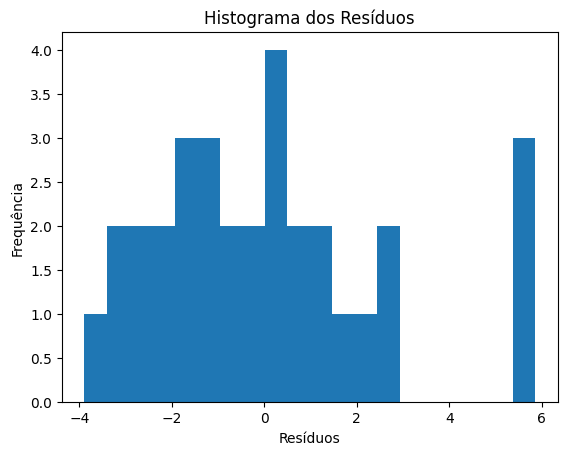

In [22]:
residuos = modelo.resid

plt.hist(residuos, bins = 20)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

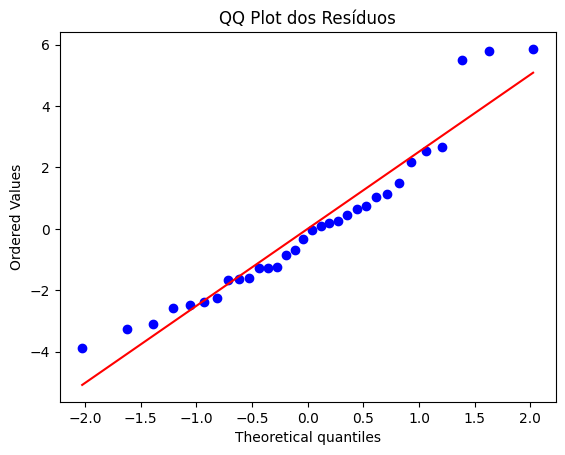

In [23]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()

In [26]:
# h0 - dados estão normalmente distribuídos
# p <= 0.05 rejeito a hipótese nula
# p > 0.05 não é possível rejeitas a h0
stat, pval = stats.shapiro(residuos)
print(f'Teste de Shapiro-Wilk: Estatística = {stat:.3f}, p-valor = {pval:.3f}')

Teste de Shapiro-Wilk: Estatística = 0.927, p-valor = 0.033
